### Introduction to visualization

The usual imports and we want to use `PathTreeBuilder` and `MoveTreeBuilder`.

In [1]:
%matplotlib inline
import openpathsampling as paths
from openpathsampling.visualize import PathTreeBuilder, PathTreeBuilder
from IPython.display import SVG, HTML

Let's load some data from our usual suspects the toy simulation.

In [2]:
st = paths.storage.Storage('_toy_retis.nc', mode='r')

Retrieve the first transition which is the RETIS transition with 6 interfaces.

In [3]:
retis = st.transitions[0]

Now build a PathTreeBuilder using the storage with some settings and showing some states.
Blue is `stateA` and should be the first and last frame only unless the trajectory crosses to `stateB`
The Interfaces are indicated by shades of red. 

Finally the number in the snapshot references the stored index of associated configuration holding the coordinates.

In [4]:
tree = PathTreeBuilder(st)
tree.rejected = True
tree.states = [ ('blue', retis.stateA) ]

for no, interface in enumerate(retis.interfaces[0:]):
    tree.states.append(('rgb(' + str(no*30) + ',0,0)', interface))

tree.op = lambda snap : 'B' if snap.reversed else 'F'
tree.op = lambda snap : snap.configuration.idx[st]
heritage = tree.construct_heritage(st.samples[100])
tree.from_samples(heritage)

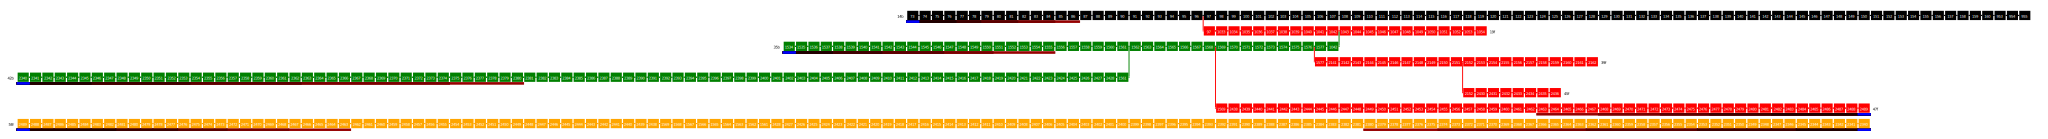

In [5]:
view = tree.renderer
view.zoom = 1.1
view.scale_y = 20
view.scale_x = 16
view.font_size = 0.24
SVG(view.to_svg())

Next is the movetreebuilder

In [6]:
movevis = paths.visualize.MoveTreeBuilder(st)

This shows the full movepath of all steps (right now this disables and only shows the first step!)

In [7]:
movevis.full(retis.ensembles)

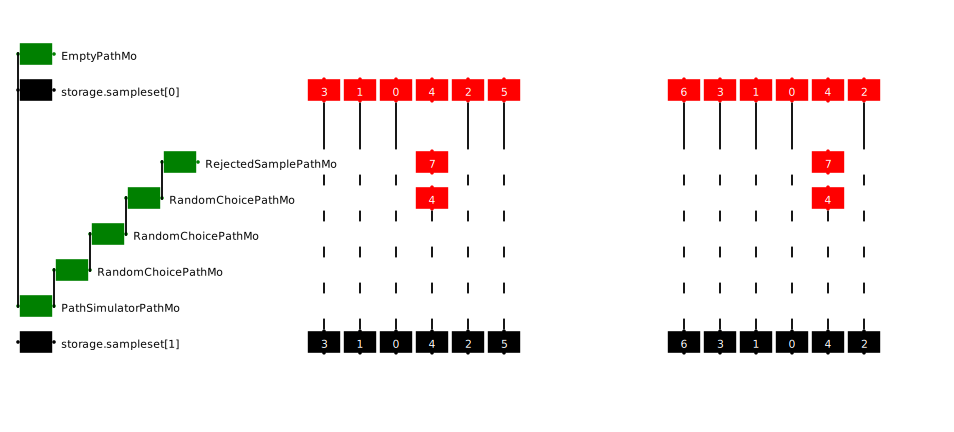

In [8]:
view = movevis.renderer
view.zoom = 1.5
SVG(view.to_svg())

Next display a Mover (the structure of possible moves, not the concrete realization during a simulation!)

and get the `default_mover` from the RETIS simulation

In [9]:
default_mover = retis.default_movers(st.engines[0])

and display it and show which of the RETIS ensembles are used in which mover

In [10]:
all_ensembles = [retis.minus_ensemble._segment_ensemble] + [retis.minus_ensemble] + retis.ensembles

In [11]:
default_mover.submovers[3].submovers

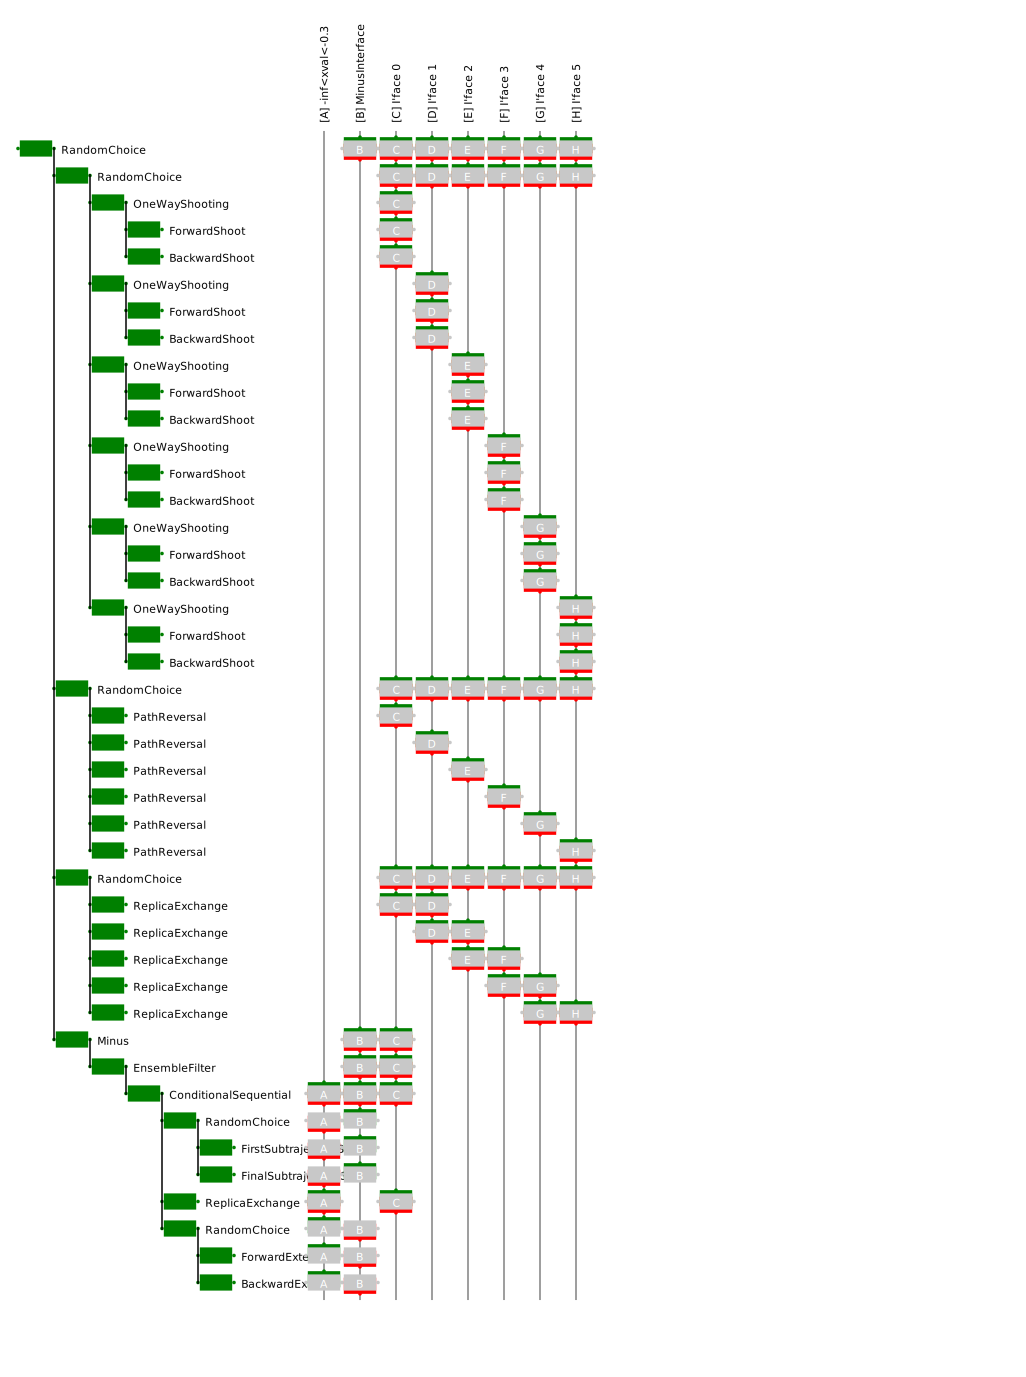

In [12]:
movevis.mover(default_mover, all_ensembles)
view = movevis.renderer
view.zoom = 1.5
view.scale_y = 18
view.scale_th = 20
view.font_size = 0.4
SVG(view.to_svg())

In [13]:
view.save_pdf('RETIS_Scheme.pdf')

This is experimental D3 support. 

In [14]:
vis = paths.visualize.MoveTreeNX(default_mover)

In [15]:
HTML(vis.d3vis())

Goal should be to have a dynamic view on what is happening, like an automatically updated movetree or showing which mover is currently used. Using the capabilities of D3 this should be quite easy.